# Code generated by Perplexity
- link: https://www.perplexity.ai/search/download-market-data-for-nvida-lWMTvGOsQ1iLuVPK8mZqwQ


# Get market data for ticker and market index

In [1]:

import pandas as pd
from datetime import datetime, timedelta
import os

def get_stock_data(tickers, start_date, end_date, filename='nvda_normalization_data.csv'):
    if os.path.exists(filename):
        print(f"Loading data from {filename}")
        combined_data = pd.read_csv(filename, index_col=0, parse_dates=True)
    else:
        print("Downloading data...")
        import yfinance as yf

        data = {}
        for ticker in tickers:
            data[ticker] = yf.download(ticker, start=start_date, end=end_date)

        combined_data = pd.concat(data, axis=1, keys=tickers)
        combined_data.columns = ['_'.join(col).strip() for col in combined_data.columns.values]
        combined_data = combined_data.dropna()  # Ensure only dates with data for all tickers are kept

        print(f"Saving data to {filename}")
        combined_data.to_csv(filename)

    return combined_data

# Usage
end_date = datetime(2025, 2, 12)
start_date = end_date - timedelta(days=3*365)
tickers = ["NVDA", "^GSPC"]  # NVIDIA and S&P 500

combined_data = get_stock_data(tickers, start_date, end_date)


Loading data from nvda_normalization_data.csv


# Data (raw features)

In [2]:
combined_data.head()


,NVDA_Close_NVDA,NVDA_High_NVDA,NVDA_Low_NVDA,NVDA_Open_NVDA,NVDA_Volume_NVDA,^GSPC_Close_^GSPC,^GSPC_High_^GSPC,^GSPC_Low_^GSPC,^GSPC_Open_^GSPC,^GSPC_Volume_^GSPC
Date,,,,,,,,,,
2022-02-14,24.226711,24.833702,23.715560,23.894264,440424000,4401.669922,4426.220215,4364.839844,4412.609863,4600390000
2022-02-15,26.451010,26.500926,24.742850,24.907575,699869000,4471.069824,4472.770020,4429.279785,4429.279785,4430830000
2022-02-16,26.466984,26.537867,25.509576,26.215403,732676000,4475.009766,4489.549805,4429.680176,4455.750000,4283640000
2022-02-17,24.466309,25.742186,24.124877,25.587443,810595000,4380.259766,4456.060059,4373.810059,4456.060059,4539420000
2022-02-18,23.602745,24.944513,23.061645,24.627041,761255000,4348.870117,4394.600098,4327.220215,4384.569824,4708060000


# Plots

## Price

Varies quite a bit over the time range

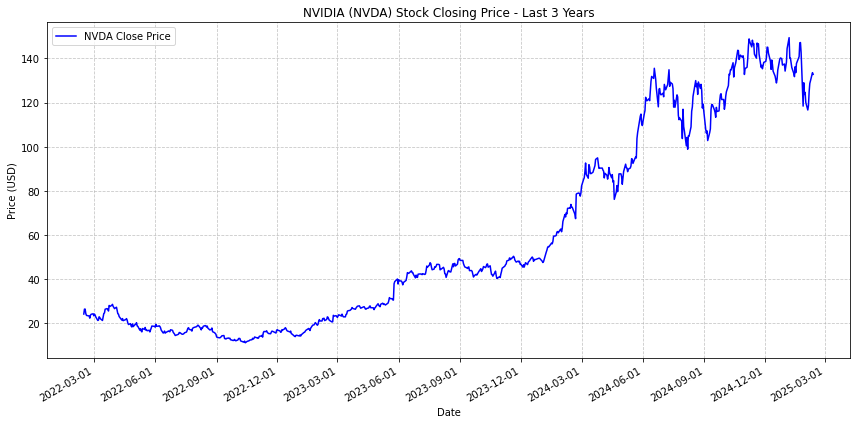

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['NVDA_Close_NVDA'], label='NVDA Close Price', color='blue')

plt.title('NVIDIA (NVDA) Stock Closing Price - Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('nvda_close_price_plot.png')
plt.show()

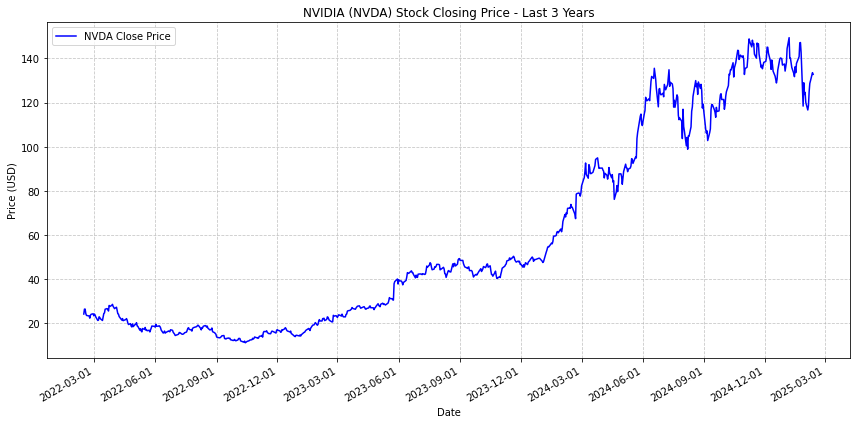

In [4]:
fig

## Volume, in shares

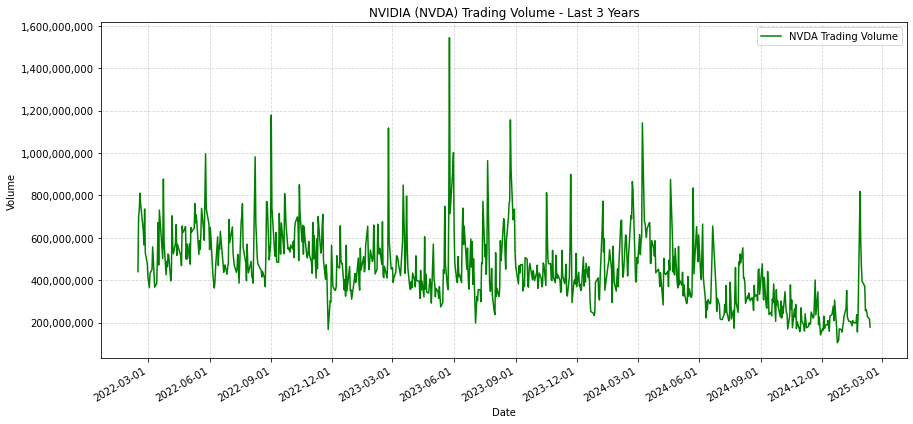

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['NVDA_Volume_NVDA'], label='NVDA Trading Volume', color='green')

plt.title('NVIDIA (NVDA) Trading Volume - Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Format y-axis to use comma as thousand separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('nvda_volume_timeseries_plot.png')
plt.show()


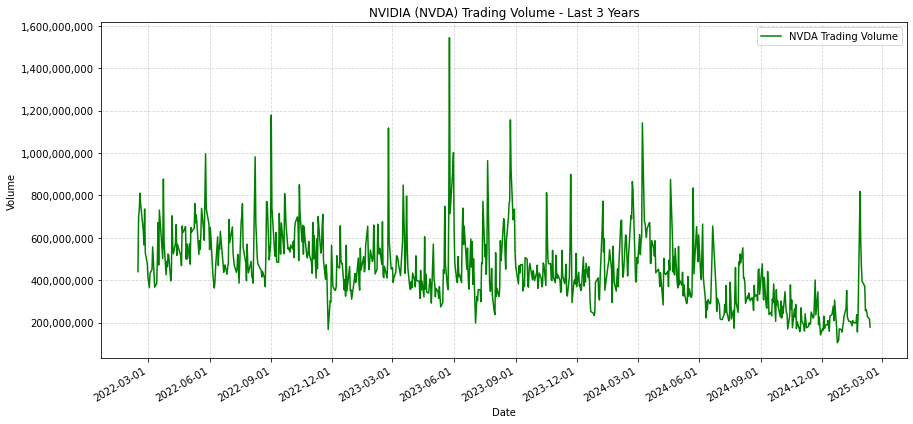

In [6]:
fig

## Volume (in dollars)

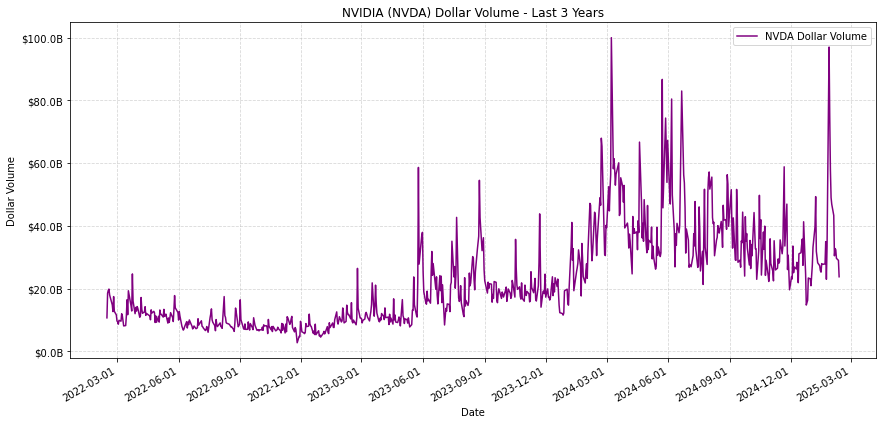

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate dollar volume
combined_data['NVDA_Dollar_Volume'] = combined_data['NVDA_Close_NVDA'] * combined_data['NVDA_Volume_NVDA']

fig = plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['NVDA_Dollar_Volume'], label='NVDA Dollar Volume', color='purple')

plt.title('NVIDIA (NVDA) Dollar Volume - Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Dollar Volume')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Format y-axis to use comma as thousand separator and show in billions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

plt.savefig('nvda_dollar_volume_timeseries_plot.png')
plt.show()


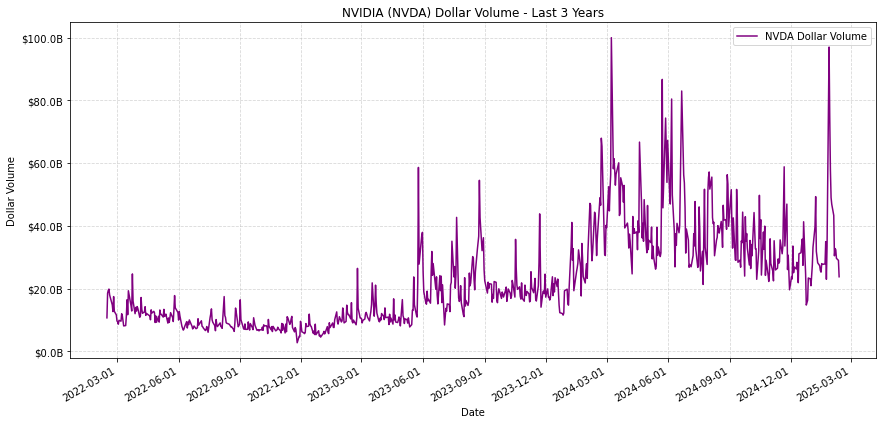

In [8]:
fig

## Volume (relative to total market volume)

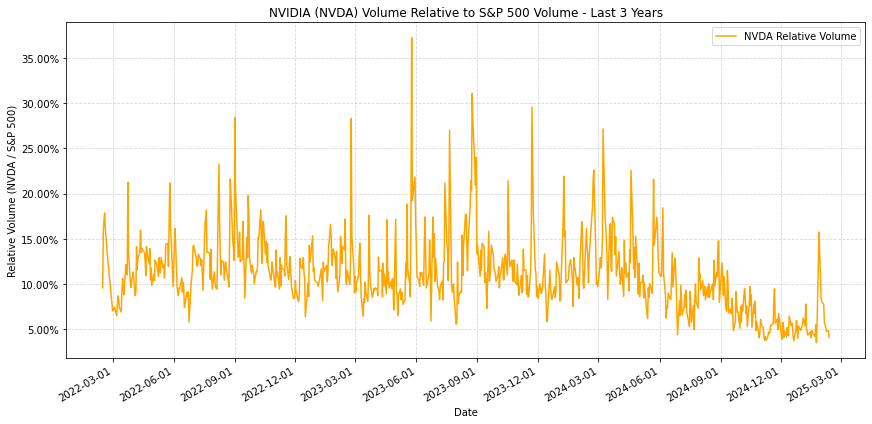

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate relative volume using the correct column name
combined_data['NVDA_Relative_Volume'] = combined_data['NVDA_Volume_NVDA'] / combined_data['^GSPC_Volume_^GSPC']

fig = plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['NVDA_Relative_Volume'], label='NVDA Relative Volume', color='orange')

plt.title('NVIDIA (NVDA) Volume Relative to S&P 500 Volume - Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Relative Volume (NVDA / S&P 500)')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2%}'))

plt.savefig('nvda_relative_volume_timeseries_plot.png')
plt.show()


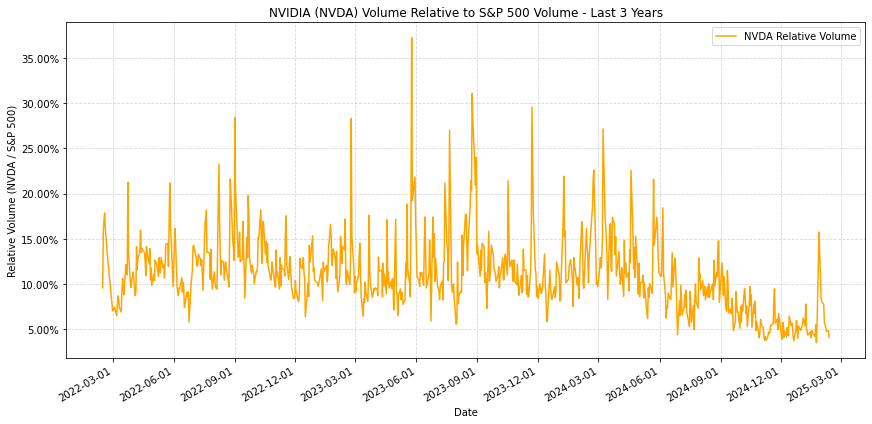

In [10]:
fig

# Let's assume that the training data and test data are from the first/second half.

Are the distributions of training/test data similar ?

Note: we are assuming the second half if closer to the present, and therefore a more accurate proxy for unseen data that will be encountered in the near future.



## Price distributions

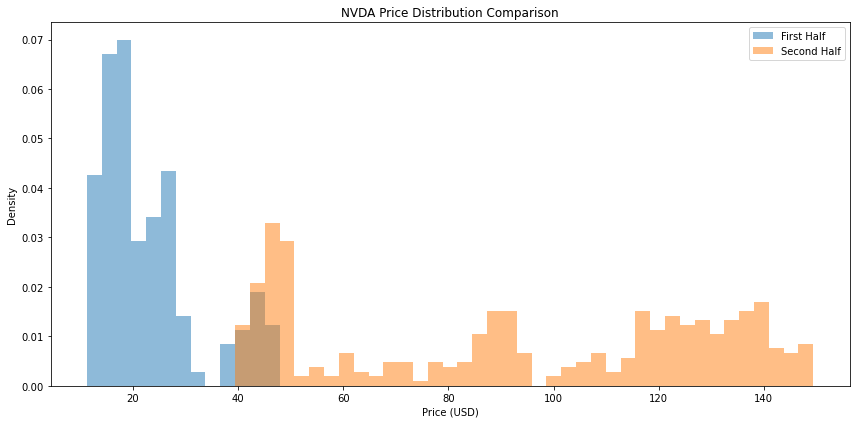

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is our dataframe with the stock data
nvda_prices = combined_data['NVDA_Close_NVDA']

# Split the data into two equal parts
mid_point = len(nvda_prices) // 2
first_half = nvda_prices[:mid_point]
second_half = nvda_prices[mid_point:]

# Create the plot
fig = plt.figure(figsize=(12, 6))

# Calculate the range for consistent binning
min_price = min(nvda_prices.min(), second_half.min())
max_price = max(nvda_prices.max(), second_half.max())
bins = np.linspace(min_price, max_price, 50)

# Plot overlapping histograms
plt.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
plt.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)

plt.title('NVDA Price Distribution Comparison')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig('nvda_price_histogram_comparison.png')
plt.show()


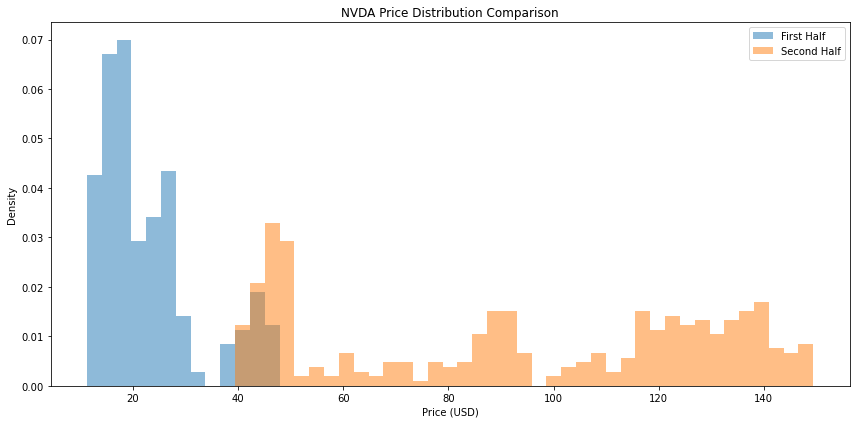

In [12]:
fig

## Volume (shares) distributions

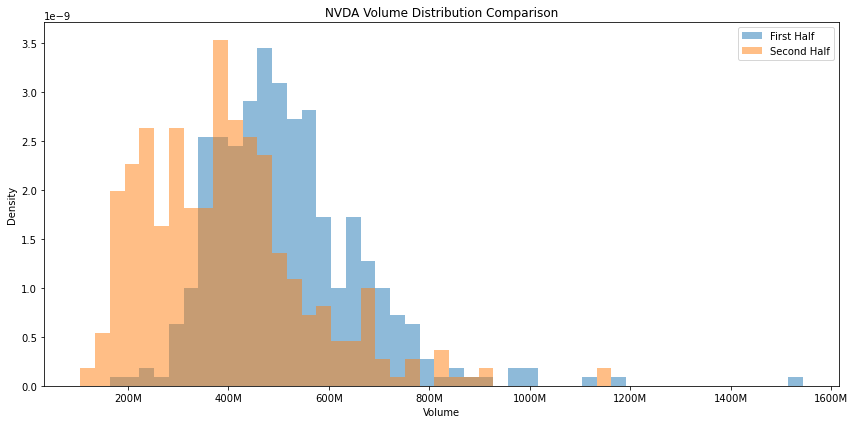

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is our dataframe with the stock data
nvda_volume = combined_data['NVDA_Volume_NVDA']

# Split the data into two equal parts
mid_point = len(nvda_volume) // 2
first_half = nvda_volume[:mid_point]
second_half = nvda_volume[mid_point:]

# Create the plot
fig = plt.figure(figsize=(12, 6))

# Calculate the range for consistent binning
min_volume = min(nvda_volume.min(), second_half.min())
max_volume = max(nvda_volume.max(), second_half.max())
bins = np.linspace(min_volume, max_volume, 50)

# Plot overlapping histograms
plt.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
plt.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)

plt.title('NVDA Volume Distribution Comparison')
plt.xlabel('Volume')
plt.ylabel('Density')
plt.legend()

# Format x-axis to show volume in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.savefig('nvda_volume_histogram_comparison.png')
plt.show()


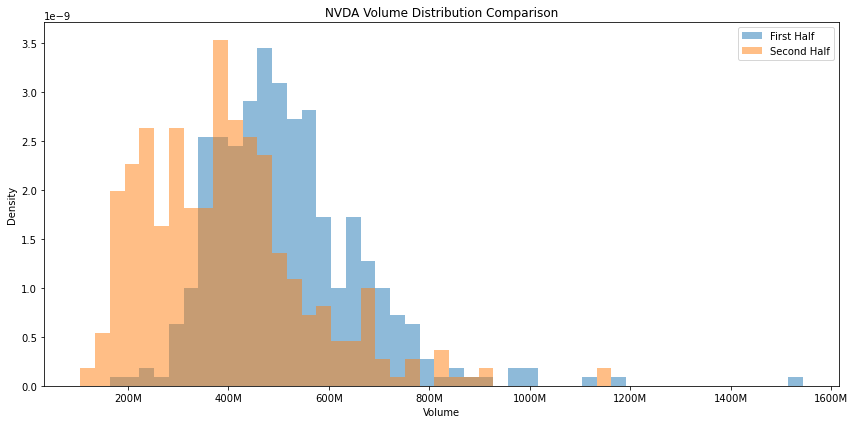

In [14]:
fig

## Volume (dollars) distributions

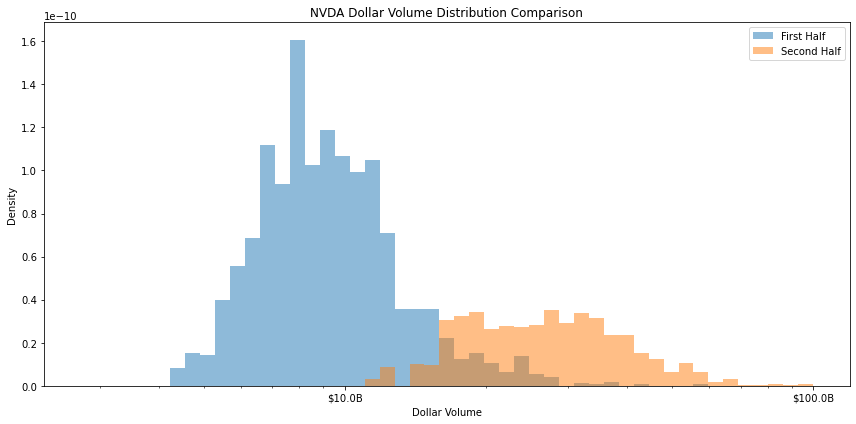

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate dollar volume
nvda_dollar_volume = combined_data['NVDA_Close_NVDA'] * combined_data['NVDA_Volume_NVDA']

# Split the data into two equal parts
mid_point = len(nvda_dollar_volume) // 2
first_half = nvda_dollar_volume[:mid_point]
second_half = nvda_dollar_volume[mid_point:]

# Create the plot
fig = plt.figure(figsize=(12, 6))

# Calculate the range for consistent binning
min_dollar_volume = min(nvda_dollar_volume.min(), second_half.min())
max_dollar_volume = max(nvda_dollar_volume.max(), second_half.max())
bins = np.logspace(np.log10(min_dollar_volume), np.log10(max_dollar_volume), 50)

# Plot overlapping histograms
plt.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
plt.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)

plt.title('NVDA Dollar Volume Distribution Comparison')
plt.xlabel('Dollar Volume')
plt.ylabel('Density')
plt.legend()

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

plt.tight_layout()
plt.savefig('nvda_dollar_volume_histogram_comparison.png')
plt.show()


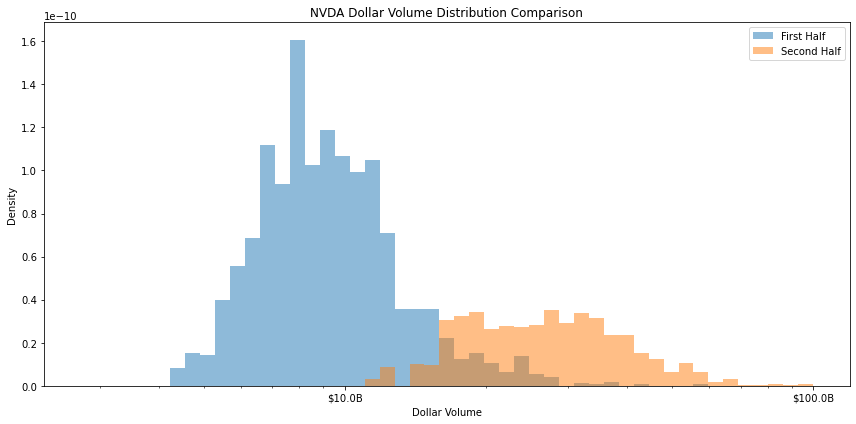

In [16]:
fig

## Volume (relative to market) distributions

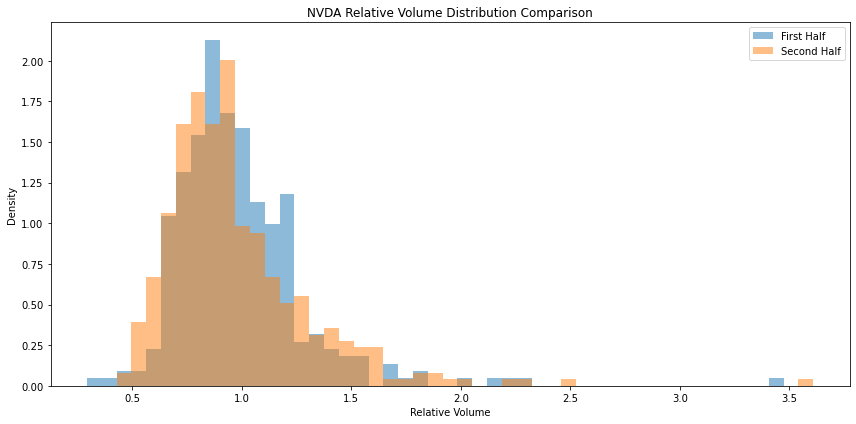

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate relative volume
avg_volume = combined_data['NVDA_Volume_NVDA'].rolling(window=50).mean()
nvda_relative_volume = combined_data['NVDA_Volume_NVDA'] / avg_volume

# Split the data into two equal parts
mid_point = len(nvda_relative_volume) // 2
first_half = nvda_relative_volume[:mid_point]
second_half = nvda_relative_volume[mid_point:]

# Create the plot
fig = plt.figure(figsize=(12, 6))

# Calculate the range for consistent binning
min_rel_volume = min(nvda_relative_volume.min(), second_half.min())
max_rel_volume = max(nvda_relative_volume.max(), second_half.max())
bins = np.linspace(min_rel_volume, max_rel_volume, 50)

# Plot overlapping histograms
plt.hist(first_half, bins=bins, alpha=0.5, label='First Half', density=True)
plt.hist(second_half, bins=bins, alpha=0.5, label='Second Half', density=True)

plt.title('NVDA Relative Volume Distribution Comparison')
plt.xlabel('Relative Volume')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.savefig('nvda_relative_volume_histogram_comparison.png')
plt.show()


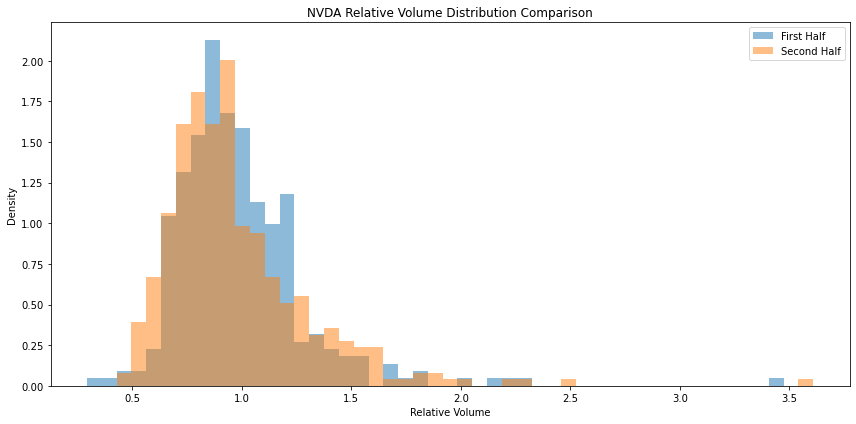

In [18]:
fig